In [2]:
# Import storing and analysis related libraries
import numpy as np
import pandas as pd

# import visualization related libraries
import matplotlib.pyplot as plt
import seaborn as sns
from chart_studio import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import folium

import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [5]:
# import dataset
df = pd.read_csv('../../EDA/COVID-19.csv', parse_dates=['Date'])

df1 = df.copy()
df.head()

,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2020-02-01,7153,249,168
1,Zhejiang,Mainland China,2020-02-01,599,0,21
2,Guangdong,Mainland China,2020-02-01,535,0,14
3,Henan,Mainland China,2020-02-01,422,2,3
4,Hunan,Mainland China,2020-02-01,389,0,8


In [6]:
# dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 6 columns):
Province/State    1338 non-null object
Country/Region    1916 non-null object
Date              1916 non-null datetime64[ns]
Confirmed         1916 non-null int64
Deaths            1916 non-null int64
Recovered         1916 non-null int64
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 89.9+ KB


In [7]:
# checking for missing value
df.isna().sum()

Province/State    578
Country/Region      0
Date                0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

## Cleaning Data

In [8]:
# replacing Mainland china with just China
df['Country/Region'] = df['Country/Region'].replace('Mainland China', 'China')

# filling missing values with NA
df[['Province/State']] = df[['Province/State']].fillna('NA')

## Derived Tables

In [9]:
# Seperating the data with respect to the location
# cases in the Diamond Princess cruise ship
ship = df[df['Province/State']=='Diamond Princess cruise ship']

# cases in other locations
df = df[df['Province/State']!='Diamond Princess cruise ship']

# cases in only China
china = df[df['Country/Region']=='China']

# cases in other locations than China and ship
others = df[df['Country/Region']!='China']

# latest cases reported
latest_cases = df[df['Date'] == max(df['Date'])].reset_index()

# group the data according to locations
full_data_grouped = df.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
chinese_data_grouped = china.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
others_grouped = others.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

## Exploratory Data Analysis

In [10]:
# latest cases reported as 26th Feb
latest = df.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum()
latest = latest.reset_index()
latest = latest.sort_values('Date', ascending=False)
latest.head(1).style.background_gradient(cmap='Pastel1')

,Date,Confirmed,Deaths,Recovered
26,2020-02-26 00:00:00,80387,2763,30168


In [11]:
# Complete data grouped by latest date
temp = latest_cases.groupby(['Country/Region', 'Province/State', 'Date'])['Confirmed', 'Deaths', 'Recovered'].max()
temp.style.background_gradient(cmap='Pastel1_r')

## Country Wise Latest Data

In [12]:
temp = full_data_grouped[['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
temp = temp.sort_values(by='Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1_r')

,Country/Region,Confirmed,Deaths,Recovered
0,China,1367553,37451,267192
1,South Korea,4856,41,212
2,Japan,1652,15,265
3,Singapore,1479,0,510
4,Italy,1293,35,8
5,Hong Kong,1241,30,105
6,Thailand,784,0,310
7,US,514,0,68
8,Taiwan,500,11,43
9,Malaysia,446,0,179


## Chinese Province Wise Latest Data

In [13]:
temp = chinese_data_grouped[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
temp = temp.sort_values(by='Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1_r')

,Province/State,Confirmed,Deaths,Recovered
0,Hubei,1099063,36021,172905
1,Guangdong,28968,68,9664
2,Zhejiang,26785,7,10125
3,Henan,26695,278,10259
4,Hunan,21907,54,9532
5,Anhui,20489,95,6824
6,Jiangxi,19549,17,6545
7,Jiangsu,12942,0,5023
8,Shandong,12808,54,3872
9,Chongqing,12336,99,4227


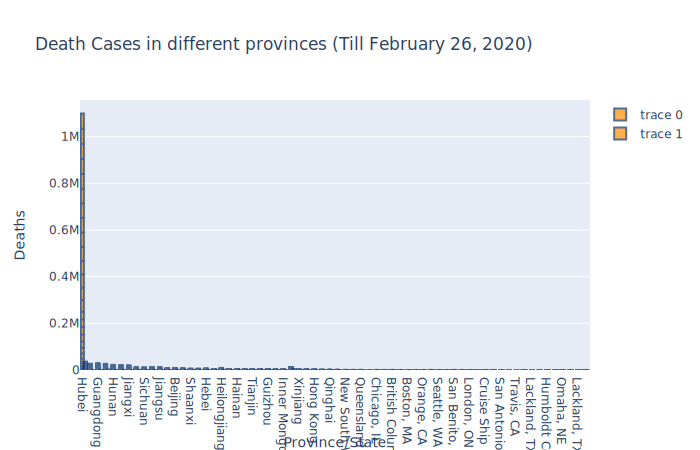

In [15]:
# Vizualizing the rise of cases from Feb 1st to Feb 26th
fig = go.Figure()
fig.add_trace(go.Bar(
                x=df["Province/State"],
                y=df["Confirmed"],
                marker_color='darkorange',
                marker_line_color='rgb(8,48,107)',
                marker_line_width=2, 
                opacity=0.7)
             )

fig.update_layout(
    title_text='Confirmed Cases in different provinces (Till February 26, 2020)',
    height=700, width=800, xaxis_title='Province/State', yaxis_title='Confirmed')

fig.show()

fig.add_trace(go.Bar(
                x=df["Province/State"],
                y=df["Deaths"],
                marker_color='darkorange',
                marker_line_color='rgb(8,48,107)',
                marker_line_width=2, 
                opacity=0.7)
             )

fig.update_layout(
    title_text='Death Cases in different provinces (Till February 26, 2020)',
    height=700, width=800, xaxis_title='Province/State', yaxis_title='Deaths')

fig.show(renderer="svg")

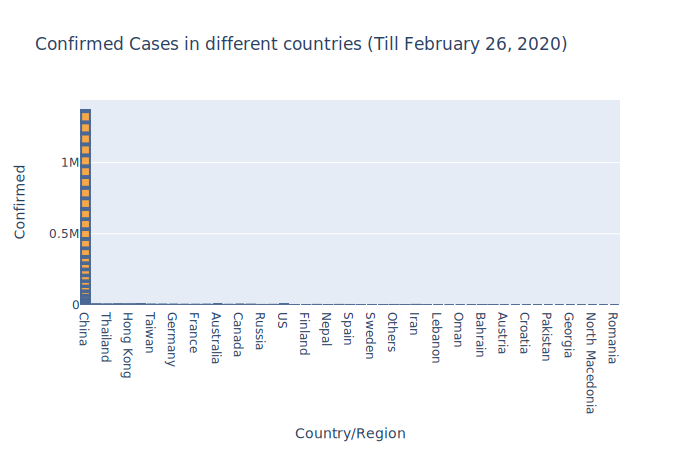

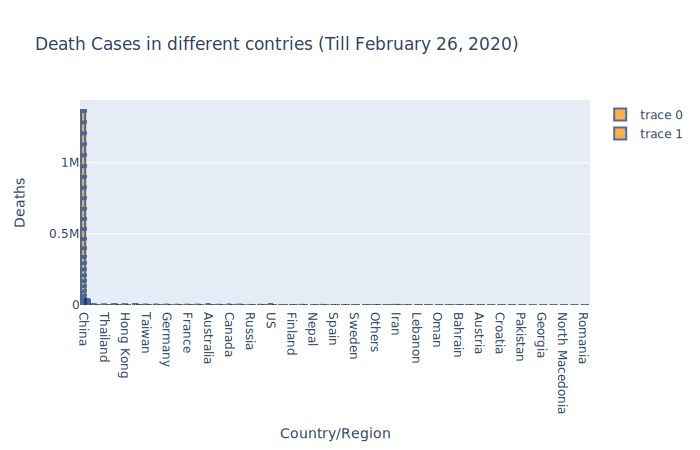

In [16]:
# Vizualizing the rise of cases from Feb 1st to Feb 26th
fig = go.Figure()
fig.add_trace(go.Bar(
                x=df["Country/Region"],
                y=df["Confirmed"],
                marker_color='darkorange',
                marker_line_color='rgb(8,48,107)',
                marker_line_width=2, 
                opacity=0.7)
             )

fig.update_layout(
    title_text='Confirmed Cases in different countries (Till February 26, 2020)',
    height=700, width=800, xaxis_title='Country/Region', yaxis_title='Confirmed')

fig.show(renderer="svg")

fig.add_trace(go.Bar(
                x=df["Country/Region"],
                y=df["Deaths"],
                marker_color='darkorange',
                marker_line_color='rgb(8,48,107)',
                marker_line_width=2, 
                opacity=0.7)
             )

fig.update_layout(
    title_text='Death Cases in different contries (Till February 26, 2020)',
    height=700, width=800, xaxis_title='Country/Region', yaxis_title='Deaths')

fig.show(renderer="svg")

## Countries with deaths reported

In [17]:
temp = full_data_grouped[['Country/Region', 'Deaths']]
temp = temp.sort_values(by='Deaths', ascending=False)
temp = temp.reset_index(drop=True)
temp = temp[temp['Deaths']>0]
temp.style.background_gradient(cmap='Pastel1_r')

,Country/Region,Deaths
0,China,37451
1,Iran,68
2,South Korea,41
3,Italy,35
4,Hong Kong,30
5,Philippines,24
6,Japan,15
7,France,13
8,Taiwan,11


## Countries and Provinces with no recovered cases

In [18]:
# Countries with no cases recovered
temp = others_grouped[others_grouped['Recovered']==0]
temp = temp[['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1_r')

,Country/Region,Confirmed,Deaths,Recovered
0,Others,122,0,0
1,Bahrain,57,0,0
2,Kuwait,38,0,0
3,Sweden,26,0,0
4,Egypt,13,0,0
5,Oman,8,0,0
6,Israel,7,0,0
7,Iraq,7,0,0
8,Lebanon,7,0,0
9,Austria,4,0,0


In [19]:
# Provinces with no cases recovered
temp = chinese_data_grouped[chinese_data_grouped['Recovered']==0]
temp = temp[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1_r')

,Province/State,Confirmed,Deaths,Recovered


## Countries and Provinces with no affected case anymore

In [20]:
temp = others_grouped[others_grouped['Confirmed']==
                          others_grouped['Deaths']+
                          others_grouped['Recovered']]
temp = temp[['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

,Country/Region,Confirmed,Deaths,Recovered


In [21]:
temp = chinese_data_grouped[chinese_data_grouped['Confirmed']==
                          chinese_data_grouped['Deaths']+
                          chinese_data_grouped['Recovered']]
temp = temp[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

,Province/State,Confirmed,Deaths,Recovered


## Countries and Provinces with all the cases recovered

In [22]:
temp = others_grouped[others_grouped['Confirmed']==
                          others_grouped['Recovered']]
temp = temp[['Country/Region', 'Confirmed', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

,Country/Region,Confirmed,Recovered


In [23]:
temp = chinese_data_grouped[chinese_data_grouped['Confirmed']==
                          chinese_data_grouped['Recovered']]
temp = temp[['Province/State', 'Confirmed', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

,Province/State,Confirmed,Recovered


## Diamond Princess Cruise ship Status

In [24]:
# Cases in the Diamond Princess Cruise Ship
temp = ship.sort_values(by='Date', ascending=False).head(1)
temp = temp[['Province/State', 'Confirmed', 'Deaths', 'Recovered']].reset_index(drop=True)
temp.style.background_gradient(cmap='rainbow')

,Province/State,Confirmed,Deaths,Recovered
0,Diamond Princess cruise ship,705,4,10


## Hubei - China - World

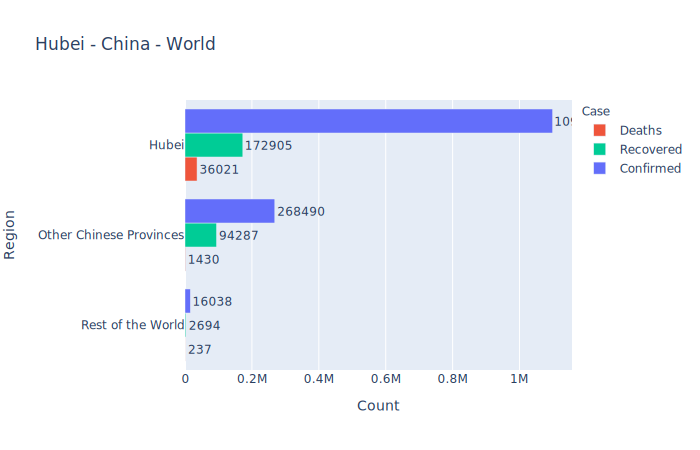

In [25]:
def location(row):
    if row['Country/Region']=='China':
        if row['Province/State']=='Hubei':
            return 'Hubei'
        else:
            return 'Other Chinese Provinces'
    else:
        return 'Rest of the World'

temp = df.copy()
temp['Region'] = temp.apply(location, axis=1)
temp = temp.groupby('Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
temp = temp.melt(id_vars='Region', value_vars=['Confirmed', 'Deaths', 'Recovered'], 
                 var_name='Case', value_name='Count').sort_values('Count')
temp.head()
fig = px.bar(temp, y='Region', x='Count', color='Case', barmode='group', orientation='h',
             text='Count', title='Hubei - China - World', 
             color_discrete_sequence= ['#EF553B', '#00CC96', '#636EFA'])
fig.update_traces(textposition='outside')
fig.show(renderer="svg")

## Number of new cases everyday

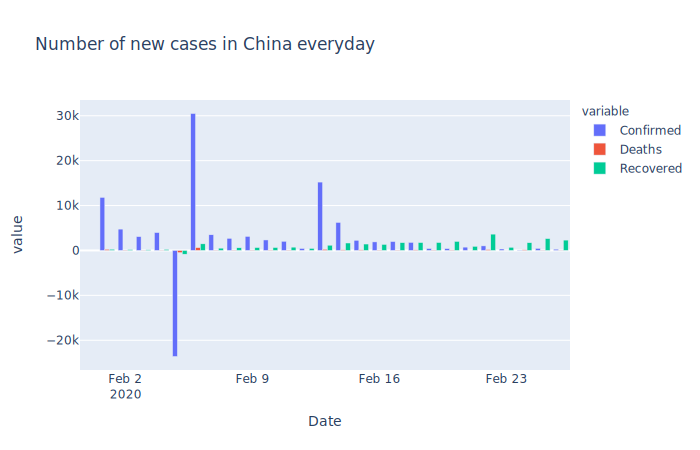

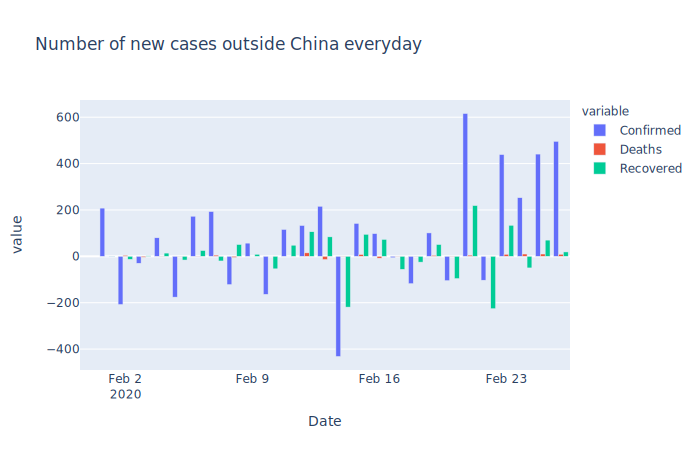

In [26]:
# In China
temp = china.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().diff()
temp = temp.reset_index()
temp = temp.melt(id_vars="Date", 
                 value_vars=['Confirmed', 'Deaths', 'Recovered'])

fig = px.bar(temp, x="Date", y="value", color='variable', 
             title='Number of new cases in China everyday')
fig.update_layout(barmode='group')
fig.show(renderer="svg")

# Others
temp = others.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().diff()
temp = temp.reset_index()
temp = temp.melt(id_vars="Date", 
                 value_vars=['Confirmed', 'Deaths', 'Recovered'])

fig = px.bar(temp, x="Date", y="value", color='variable', 
             title='Number of new cases outside China everyday')
fig.update_layout(barmode='group')
fig.show(renderer="svg")

## Number of Cases

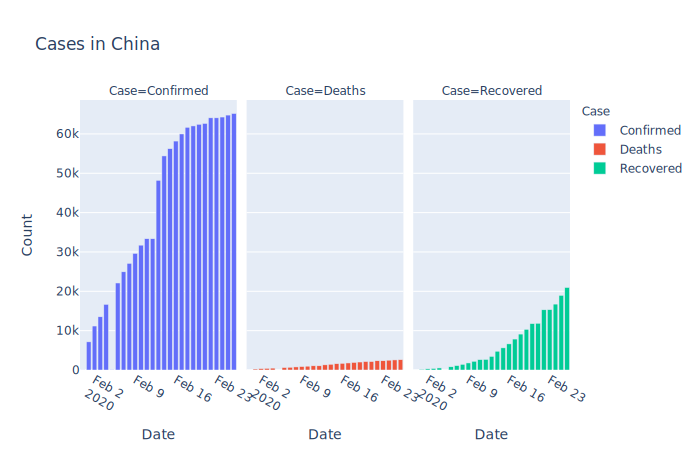

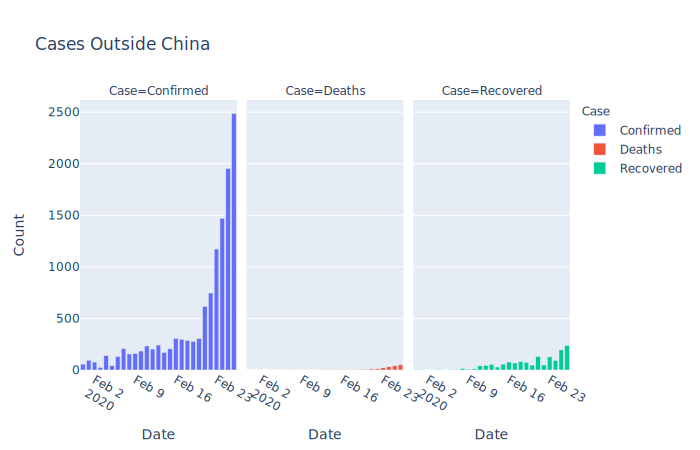

In [28]:
grouped_df = df.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
grouped_df = grouped_df.reset_index()

temp = grouped_df[grouped_df['Country/Region']=='China'].reset_index()
temp = temp.melt(id_vars='Date', value_vars=['Confirmed', 'Deaths', 'Recovered'],
                var_name='Case', value_name='Count')
fig = px.bar(temp, x="Date", y="Count", color='Case', facet_col="Case",
            title='Cases in China')
fig.show(renderer="svg")

temp = grouped_df[grouped_df['Country/Region']!='China'].groupby('Date').sum().reset_index()
temp = temp.melt(id_vars='Date', value_vars=['Confirmed', 'Deaths', 'Recovered'],
                var_name='Case', value_name='Count')
fig = px.bar(temp, x="Date", y="Count", color='Case', facet_col="Case",
             title='Cases Outside China')
fig.show(renderer="svg")

## Number of Places to which COVID-19 Spread

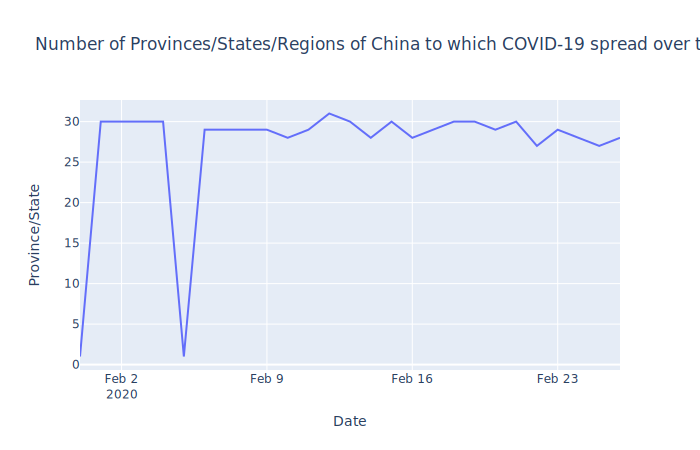

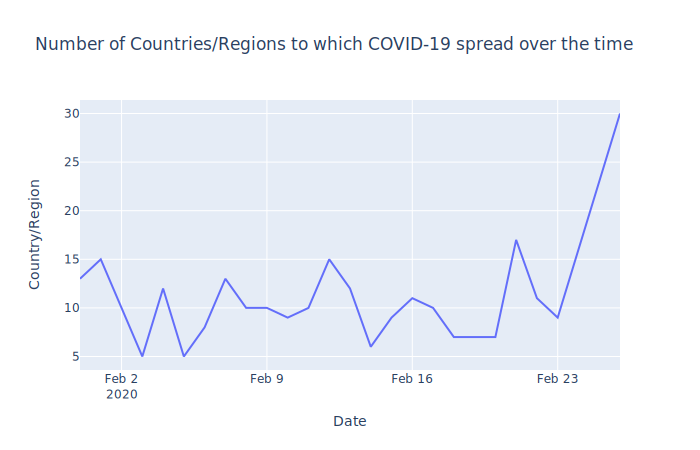

In [29]:
virus_spread_Chinese = china[china['Confirmed']!=0].groupby('Date')['Province/State'].unique().apply(len)
virus_spread_Chinese = pd.DataFrame(virus_spread_Chinese).reset_index()

fig = px.line(virus_spread_Chinese, x='Date', y='Province/State', 
              title='Number of Provinces/States/Regions of China to which COVID-19 spread over the time')
fig.show(renderer="svg")

# ------------------------------------------------------------------------------------------

spread_others = df[df['Confirmed']!=0].groupby('Date')['Country/Region'].unique().apply(len)
spread_others = pd.DataFrame(spread_others).reset_index()

fig = px.line(spread_others, x='Date', y='Country/Region', 
              title='Number of Countries/Regions to which COVID-19 spread over the time')
fig.show(renderer="svg")

## Recovery and Mortality Rate Over The Time

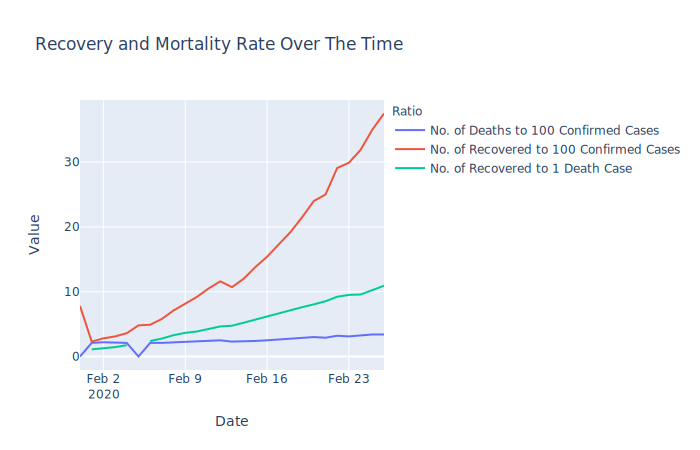

In [30]:
temp = df.groupby('Date').sum().reset_index()
temp.head()

# adding two more columns
temp['No. of Deaths to 100 Confirmed Cases'] = round(temp['Deaths']/
                                                     temp['Confirmed'], 3)*100
temp['No. of Recovered to 100 Confirmed Cases'] = round(temp['Recovered']/
                                                        temp['Confirmed'], 3)*100
temp['No. of Recovered to 1 Death Case'] = round(temp['Recovered']/
                                                 temp['Deaths'], 3)

temp = temp.melt(id_vars='Date', 
                 value_vars=['No. of Deaths to 100 Confirmed Cases', 
                             'No. of Recovered to 100 Confirmed Cases', 
                             'No. of Recovered to 1 Death Case'], 
                 var_name='Ratio', 
                 value_name='Value')

fig = px.line(temp, x="Date", y="Value", color='Ratio', 
              title='Recovery and Mortality Rate Over The Time')
fig.show(renderer="svg")

## Comparision between different Epidemics

In [31]:
    epidemics = pd.DataFrame({
    'epidemic' : ['COVID-19', 'SARS', 'EBOLA', 'MERS', 'H1N1'],
    'start_year' : [2019, 2003, 2014, 2012, 2009],
    'end_year' : [2020, 2004, 2016, 2017, 2010],
    'confirmed' : [1383591, 8096, 28646, 2494, 6724149],
    'deaths' : [37688, 774, 11323, 858, 19654]
})

epidemics['mortality'] = round((epidemics['deaths']/epidemics['confirmed'])*100, 2)

epidemics.head()

,epidemic,start_year,end_year,confirmed,deaths,mortality
0,COVID-19,2019,2020,1383591,37688,2.72
1,SARS,2003,2004,8096,774,9.56
2,EBOLA,2014,2016,28646,11323,39.53
3,MERS,2012,2017,2494,858,34.40
4,H1N1,2009,2010,6724149,19654,0.29


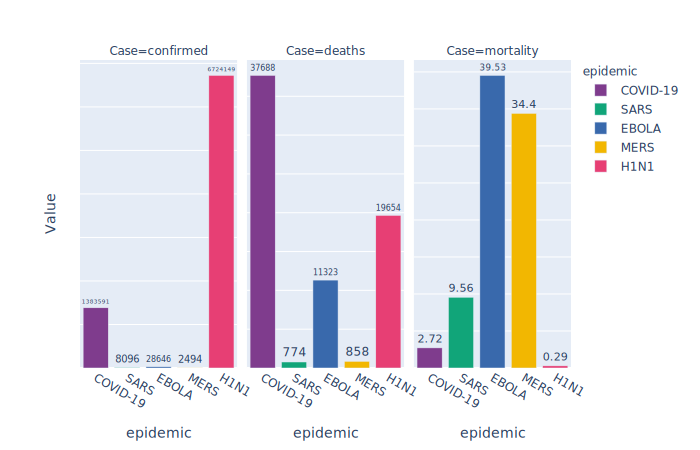

In [32]:
temp = epidemics.melt(id_vars='epidemic', value_vars=['confirmed', 'deaths', 'mortality'],
                      var_name='Case', value_name='Value')
fig = px.bar(temp, x="epidemic", y="Value", color='epidemic', text='Value', facet_col="Case",
             color_discrete_sequence = px.colors.qualitative.Bold)
fig.update_traces(textposition='outside')

fig.update_yaxes(showticklabels=False)
fig.layout.yaxis2.update(matches=None)
fig.layout.yaxis3.update(matches=None)
fig.show(renderer="svg")
